In [48]:
import pandas
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

playlist = pandas.read_csv('top2018.csv', index_col = ["name"])
playlist.columns = playlist.columns.str.replace(' ', '_')
playlist.head()

playlist2 = pandas.read_csv('data_2019.csv')

GOAL: Go through Spotify's top music of 2018 and 2019 to investigate clustering tendency and determine if it's possible to group songs together based on their audio features such as danceability, energy, key, acousticness, etc.

Determine if the content in each cluster is related, and if there are specific patterns: do the songs in a cluster belong to same artist or same genre?

Because of the multidimensionality of the data, we will cluster based on just two key elements at a time, and observe whether we can group similar songs together, accounting for just energy and key, energy and acousticness, etc. 

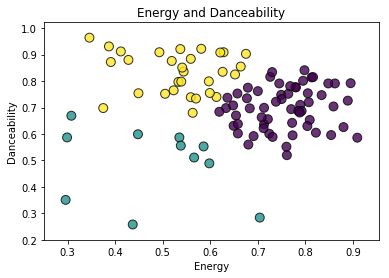

[0.69827119 0.75528814 0.49490909 0.48318182 0.83346667 0.5343    ]
kmeans cluster centers
[[  0.64838462 126.31084615]
 [  0.66212766  94.6283617 ]
 [  0.71233333 179.54533333]
 [  0.63983333 146.8275    ]]


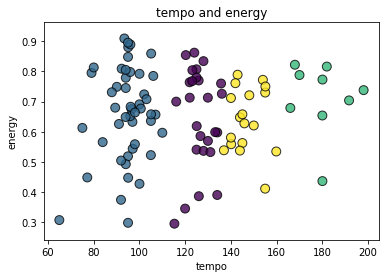

[  0.64838462 126.31084615   0.66212766  94.6283617    0.71233333
 179.54533333   0.63983333 146.8275    ]
kmeans cluster centers
[[146.8275       0.72427778]
 [ 94.6283617    0.73082979]
 [179.54533333   0.60055556]
 [126.31084615   0.72519231]]


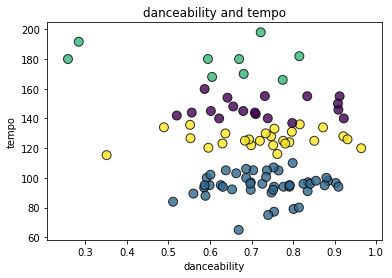

[146.8275       0.72427778  94.6283617    0.73082979 179.54533333
   0.60055556 126.31084615   0.72519231]
kmeans cluster centers
[[  0.66212766  94.6283617 ]
 [  0.64576471 147.40858824]
 [  0.71233333 179.54533333]
 [  0.64433333 126.70485185]]


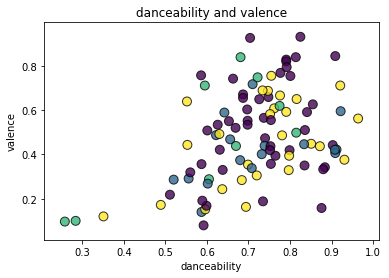

[  0.66212766  94.6283617    0.64576471 147.40858824   0.71233333
 179.54533333   0.64433333 126.70485185]
kmeans cluster centers
[[0.22833182 0.67213636]
 [0.74803846 0.75403846]
 [0.39073913 0.46634783]
 [0.51672414 0.71682759]]


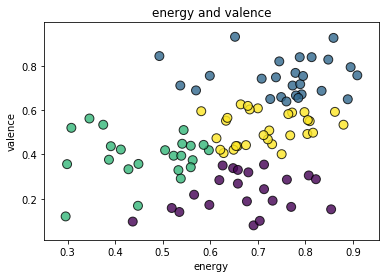

[0.22833182 0.67213636 0.74803846 0.75403846 0.39073913 0.46634783
 0.51672414 0.71682759]
kmeans cluster centers
[[  0.64576471 147.40858824]
 [  0.66212766  94.6283617 ]
 [  0.64433333 126.70485185]
 [  0.71233333 179.54533333]]


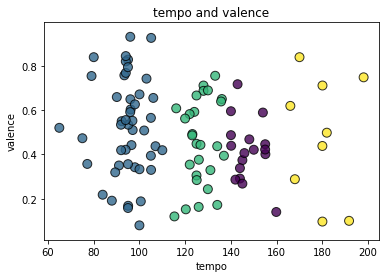

[  0.64576471 147.40858824   0.66212766  94.6283617    0.64433333
 126.70485185   0.71233333 179.54533333]


In [61]:
#First, to cluster by artist, we need to figure out how many 
#individual artists made the top 2018 list.
playlist['artists'].nunique()

##danceability and energy
danceability = playlist['danceability']
energy = playlist['energy']
all_pairs = tuple(zip(danceability, energy))
##cluster 
kmeans = KMeans(n_clusters=3)
km = kmeans.fit(all_pairs)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in all_pairs], [x[0] for x in all_pairs], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('Energy and Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()



##tempo and energy
tempo = playlist['tempo']
tempo_energy = tuple(zip(energy, tempo))
##cluster
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(tempo_energy)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in tempo_energy], [x[0] for x in tempo_energy], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('tempo and energy')
plt.xlabel('tempo')
plt.ylabel('energy')
plt.show()


##danceability and tempo
tempo_danceability = tuple(zip(tempo, danceability))
##cluster
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(tempo_danceability)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in tempo_danceability], [x[0] for x in tempo_danceability], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('danceability and tempo')
plt.xlabel('danceability')
plt.ylabel('tempo')
plt.show()


##danceability and valence
valence = playlist['valence']
valence_danceability = tuple(zip(valence, danceability))
##clustering
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(tempo_energy)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in valence_danceability], [x[0] for x in valence_danceability], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('danceability and valence')
plt.xlabel('danceability')
plt.ylabel('valence')
plt.show()


##valence and energy
valence_energy = tuple(zip(valence, energy))
#cluster
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(valence_energy)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in valence_energy], [x[0] for x in valence_energy], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('energy and valence')
plt.xlabel('energy')
plt.ylabel('valence')
plt.show()


##valence and tempo
valence_tempo = tuple(zip(valence, tempo))
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(tempo_energy)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in valence_tempo], [x[0] for x in valence_tempo], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('tempo and valence')
plt.xlabel('tempo')
plt.ylabel('valence')
plt.show()



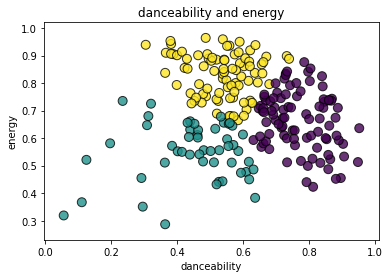

[0.66476087 0.77126087 0.55119608 0.4546098  0.8298     0.53795294]
kmeans cluster centers
[[  0.59972727 121.33938636]
 [  0.60543118  91.63364516]
 [  0.64974194 168.78367742]
 [  0.6172     143.94326667]]


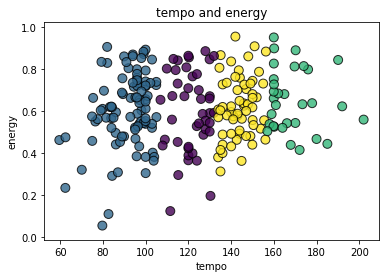

kmeans cluster centers
[[121.33938636   0.74631818]
 [168.78367742   0.63332258]
 [ 91.63364516   0.68491398]
 [143.94326667   0.72723333]]


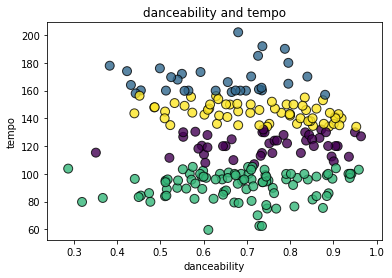

kmeans cluster centers
[[  0.60543243 134.27809459]
 [  0.64772917 162.78227083]
 [  0.54286389  81.09366667]
 [  0.63472857 100.86074286]]


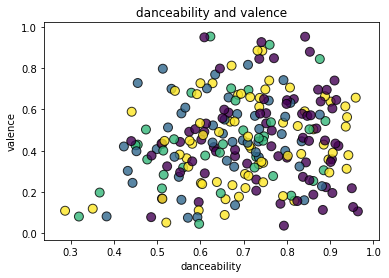

kmeans cluster centers
[[0.47986567 0.48707463]
 [0.40712281 0.73608772]
 [0.18486538 0.49763654]
 [0.72196154 0.75767308]]


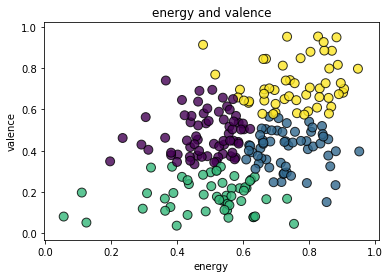

kmeans cluster centers
[[  0.60543118  91.63364516]
 [  0.61527586 143.52186207]
 [  0.65115152 168.01884848]
 [  0.59972727 121.33938636]]


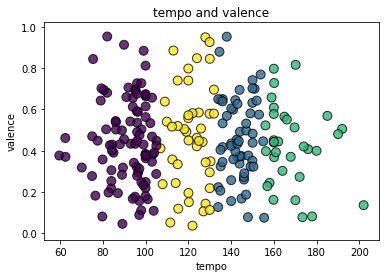

In [62]:
##2019 data
danceability = playlist2['danceability']
energy = playlist2['energy']
all_pairs = tuple(zip(danceability, energy))

#cluster danceability and energy
kmeans = KMeans(n_clusters=3)
km = kmeans.fit(all_pairs)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in all_pairs], [x[0] for x in all_pairs], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('danceability and energy')
plt.xlabel('danceability')
plt.ylabel('energy')
plt.show()
print(kmeans.cluster_centers_.ravel())
##cluster center

##tempo and energy
tempo = playlist2['tempo']
tempo_energy = tuple(zip(energy, tempo))
##cluster
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(tempo_energy)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in tempo_energy], [x[0] for x in tempo_energy], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('tempo and energy')
plt.xlabel('tempo')
plt.ylabel('energy')
plt.show()


##danceability and tempo
tempo_danceability = tuple(zip(tempo, danceability))
##cluster
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(tempo_danceability)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in tempo_danceability], [x[0] for x in tempo_danceability], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('danceability and tempo')
plt.xlabel('danceability')
plt.ylabel('tempo')
plt.show()


##danceability and valence
valence = playlist2['valence']
valence_danceability = tuple(zip(valence, danceability))
##clustering
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(tempo_energy)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in valence_danceability], [x[0] for x in valence_danceability], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('danceability and valence')
plt.xlabel('danceability')
plt.ylabel('valence')
plt.show()


##valence and energy
valence_energy = tuple(zip(valence, energy))
#cluster
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(valence_energy)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in valence_energy], [x[0] for x in valence_energy], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('energy and valence')
plt.xlabel('energy')
plt.ylabel('valence')
plt.show()


##valence and tempo
valence_tempo = tuple(zip(valence, tempo))
kmeans = KMeans(n_clusters=4)
km = kmeans.fit(tempo_energy)
print("kmeans cluster centers")
print(kmeans.cluster_centers_)
ind_clusters = kmeans.labels_
plt.scatter([x[1] for x in valence_tempo], [x[0] for x in valence_tempo], cmap='viridis',
            edgecolor='k', s=80, c= ind_clusters, alpha =0.8)
plt.title('tempo and valence')
plt.xlabel('tempo')
plt.ylabel('valence')
plt.show()
